In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

A = np.r_[1:13].reshape(3, 4)
A

/home/mathlizard/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

# Recall -- Vector indexing:
1.  scalar
2.  slice
3.  logical vector
4.  int vector

# Matrix Indexing

A[i, j] == A[(i, j)]

* i selects rows (axis=0)
* j selects columns (axis=1)

(i, j)  |  scalar   | slice  | logical  | int
--------|-----------| --------|--------|--------
scalar  |    scalar |vector*   |vector | vector
slice   |    x      | matrix (subblock)* | matrix |
logical |    x      |     x    | vectorized | vectorized 
int     |    x      |   x      |    x    | 


* = view

In [2]:
A[0,1] #1st row, 2nd col

2

In [3]:
A[2, ::2]

array([ 9, 11])

In [4]:
A[2:, -1]

array([12])

In [5]:
A[2, A.mean(axis=0)>5]

array([10, 11, 12])

In [6]:
A[ ::-1,2:]

array([[11, 12],
       [ 7,  8],
       [ 3,  4]])

In [7]:
A[[0,-1, 0], 2:]

array([[ 3,  4],
       [11, 12],
       [ 3,  4]])

In [8]:
A[[True, False, True], 2:]

array([[ 3,  4],
       [11, 12]])

In [9]:
A[[0,-1],[0,1,2]]  # this is wrong

IndexError: shape mismatch: indexing arrays could not be broadcast together with shapes (2,) (3,) 

In [10]:
A[[0, -1, 0], [0, 1, 2]]  #same as A[0,0] and A[-1, 1] and A [0, 2]

array([ 1, 10,  3])

In [14]:
A[ np.r_[0,-1].reshape(-1,1), np.r_[0,1,2].reshape(1,-1)]

array([[ 1,  2,  3],
       [ 9, 10, 11]])

In [15]:
A


array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [16]:
np.ix_([0, -1], [0, 1,2])

(array([[ 0],
        [-1]]), array([[0, 1, 2]]))

In [17]:
A[np.ix_([0, -1], [0, 1,2])]

array([[ 1,  2,  3],
       [ 9, 10, 11]])

In [18]:
A[np.ix_(np.r_[True, False, True], np.r_[True, False, True, False])]

array([[ 1,  3],
       [ 9, 11]])

In [19]:
y = np.r_[1, 7, 0, 5, 0]

In [20]:
y

array([1, 7, 0, 5, 0])

In [21]:
y.shape

(5,)

In [24]:
A = np.zeros((y.shape[0], 10))
A

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [41]:
B = np.ix_(y)

In [47]:
B

(array([1, 7, 0, 5, 0]),)

In [49]:
np.arange(y.shape[0])

array([0, 1, 2, 3, 4])

In [48]:
A[np.arange(y.shape[0]), np.ix_(y)]

array([[0., 0., 0., 0., 0.]])

In [53]:
 A[np.arange(y.shape[0]), y] = 1

In [54]:
A

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [55]:
A = np.where(A ==1)[1]

(array([0, 1, 2, 3, 4]), array([1, 7, 0, 5, 0]))

In [73]:
def one_hot_encode(y, kmax = 10):
    A = np.zeros((y.shape[0], kmax))
    A[np.arange(y.shape[0]),y] = 1
    return A

def one_hot_encode_other_approach(y, kmax=10):
    A = np.zeros((y.shape[0], kmax))
    r = np.eye(kmax)[y]
    return r

def one_hot_decode(Y):
    y = np.where(Y ==1)[1]
    return y

def one_hot_decode_other_approach(Y):
    y = Y.argmax(axis=1)
    return y

In [62]:
one_hot_encode(y)

array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [74]:
one_hot_decode_other_approach(one_hot_encode_other_approach(y))

array([1, 7, 0, 5, 0])

In [66]:
np.argmax(A, axis=1)

array([1, 7, 0, 5, 0])

In [67]:
A.argmax(axis=1)

array([1, 7, 0, 5, 0])

In [78]:
from tensorflow.examples.tutorials.mnist import input_data
data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')


Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 26421880 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 29515 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/fashion/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 4422102 bytes.
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 5148 bytes.
Extracting data/fashion/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [79]:
X_train = data.train.images
X_test = data.test.images
Y_train = data.train.labels
Y_test = data.test.labels


In [80]:
X_train.shape

(55000, 784)

In [81]:
X_test.shape

(10000, 784)

In [82]:
Y_train.shape

(55000,)

In [83]:
Y_test.shape

(10000,)

In [84]:
np.unique(Y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

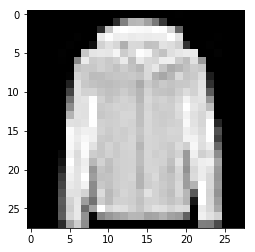

In [85]:
plt.imshow(X_train[0,:].reshape(28,28),cmap='gray')

In [86]:
Y_train[0]

4

In [93]:
def softmax(y):
    res = np.exp(y)
    tot = np.sum(res)
    return res/tot

In [94]:
softmax(np.r_[-7,24, 17])

array([3.43934084e-14, 9.99088949e-01, 9.11051194e-04])

In [97]:
softmax(np.r_[-7,24,17,-10,100,100])

array([1.69613510e-47, 4.92707734e-34, 4.49291297e-37, 8.44455940e-49,
       5.00000000e-01, 5.00000000e-01])

In [117]:

X_train2 = np.insert(X_train, 0, 1,axis=1)
X_test2 = np.insert(X_test, 0, 1, axis=1)


In [120]:
X_train2.shape

(55000, 785)

In [147]:
def softmax(Y):
    Y2 = np.exp(Y)
    return Y2/np.sum(Y2,axis=1).reshape(-1,1)

In [148]:
np.random.seed(123)
W = np.random.randn(785, 10)
softmax(X_train2@W)


array([[9.16350680e-13, 4.57736585e-07, 6.77751837e-12, ...,
        8.93287812e-20, 9.45788578e-10, 1.69588947e-18],
       [1.60936919e-04, 8.31434956e-01, 1.85583389e-09, ...,
        8.23716704e-11, 1.17890558e-01, 3.91199344e-06],
       [1.26418028e-12, 9.84686142e-01, 1.21369860e-04, ...,
        2.51172439e-13, 3.92778341e-05, 1.39287995e-09],
       ...,
       [8.52198816e-17, 2.46150245e-09, 1.18052809e-15, ...,
        4.82541210e-14, 9.19171902e-08, 2.78356242e-12],
       [1.52138920e-06, 1.36073919e-01, 1.20410325e-07, ...,
        3.91660996e-07, 9.92725808e-04, 1.46224217e-06],
       [6.07837264e-06, 9.32540985e-01, 6.58299454e-05, ...,
        3.53764148e-06, 6.04697528e-02, 3.77275773e-09]])

In [161]:
X_train = data.train.images
X_test  = data.test.images
X_train2 = np.insert(X_train, 0, 1, axis=1)#X_train + a column of 1s as the 1st col
X_test2  = np.insert(X_test, 0, 1, axis=1)#X_test  + ....

    # rewrite softmax so that it applies softmax on each row of Y
    # output has the same shape as Y
def softmax(Y):
    Y2 = np.exp(Y)
    return Y2/np.sum(Y2,axis=1).reshape(-1,1)

In [162]:
np.random.seed(123)
W = np.random.randn(785, 10)
Y=softmax(X_train2@W)

In [163]:
def one_hot_encode(y, Kmax=10):
#     r  = np.eye(Kmax)
#     r2 = r[y,:]
#     return r2

#     n = y.shape[0]
#     r = np.zeros((n,Kmax))
#     for i in range(n):
#         r[i,y[i]] = 1
#     return r

    n = y.shape[0]
    r = np.zeros((n,Kmax))
    r[np.arange(n),y] = 1
    return r


def one_hot_decode(Y):
    return np.argmax(Y,axis=1) # Y.argmax(axis=1)

In [164]:
one_hot_decode(Y)

array([5, 1, 1, ..., 5, 5, 1])

In [165]:
Y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [166]:
np.mean(one_hot_decode(Y)==Y_train)

0.048345454545454546

## How does Cross Entropy Work?

* you take the logarithm of your predicted Y's. Since the predicted Y's are in the range of [0,1], the logarithm of these values will be in the negatives.

* You then take the logarithm of the real Y's. Since it's one hot encoded, it will have 0 at one place, and undefined everywhere else 

In [171]:
Y_train2 = one_hot_encode(Y_train)
Y_test2 = one_hot_encode(Y_test)

def crossentropy_grad(W, X_train2, Y_train2):
    Y_pred = softmax(X_train2 @ W)
    return -np.sum(Y_train2 * np.log(Y_pred))/X_train2.shape[0]

In [172]:
crossentropy(W, X_train2, Y_train2)  

array([[-2.43841390e-02, -4.82317276e-02, -5.79900943e-02, ...,
         4.84493902e-01, -9.11613025e-02,  7.54357408e-02],
       [-5.54637640e-08,  6.29552405e-08, -7.12972476e-08, ...,
         2.47477218e-06, -2.85204585e-07,  2.86718904e-07],
       [-4.94819761e-06,  4.24403909e-08, -2.01560367e-06, ...,
         1.35667571e-05, -4.42047959e-06,  3.10647170e-06],
       ...,
       [ 6.77964320e-05,  7.55627387e-05, -2.90818754e-03, ...,
         7.76925499e-03, -1.60402132e-03,  1.53146488e-04],
       [ 2.90802063e-05,  9.78116415e-06, -4.50557276e-04, ...,
         1.89649859e-03, -6.72103150e-04,  1.30247441e-04],
       [-1.37220315e-06,  4.52951299e-06, -3.56494160e-05, ...,
         1.66564605e-04, -8.55216213e-05,  1.83521584e-05]])

In [173]:
def crossentropy(W, X_train2, Y_train2):
    Y_pred=softmax(X_train2 @ W)
    return -(X_train2.T @ (Y_train2-Y_pred))/X_train2.shape[0]

In [174]:
def accuracy(W, X_train2, Y_train2):
    Y_pred = softmax(X_train2 @ W)
    return np.mean(one_hot_decode(Y_pred) == one_hot_decode(Y_train2))

np.random.seed(12345)
W = np.random.randn(785,10)
maxiter = 100
eta  = 0.1
for i in range(maxiter):
    W = W - eta*crossentropy_grad(W, X_train2, Y_train2)

    print("%3d: TRAIN: accuracy=%.3f cross_entropy=%6.2f  TEST:  accuracy=%.3f cross_entropy=%6.2f" %
          (i+1,
              accuracy(W, X_train2, Y_train2),
               crossentropy(W, X_train2, Y_train2),
               accuracy(W, X_test2, Y_test2),
               crossentropy(W, X_test2, Y_test2)
          ))

/home/mathlizard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/home/mathlizard/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


TypeError: only size-1 arrays can be converted to Python scalars

In [ ]:
# stochastic gradient descent: you take multiple steps between each epoch to update w


## Tensorflow